# TP4 - Méthode des k-plus proches voisins et régression logistique

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [143]:
df = pd.read_csv('heart_cleveland.csv')
df.head(1)

,age,trestbps,chol,thalach,oldpeak,cp,exang,slope,ca,thal,condition
0,69,160,234,131,0.1,0,0,1,1,0,0


## Question 1

In [144]:
X = df[['age','trestbps','chol','thalach','oldpeak']]
y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train, y_train)
y_pred_knc_3 = knc.predict(X_test)

print(pd.DataFrame(confusion_matrix(y_test, y_pred_knc_3)))
print(f'accuracy = {accuracy_score(y_test, y_pred_knc_3)}')

    0   1
0  23   7
1  15  15
accuracy = 0.6333333333333333


In [145]:
for k in range (1,6):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    y_pred_knc_3 = knc.predict(X_test)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_knc_3)))
    print(f'accuracy = {accuracy_score(y_test, y_pred_knc_3)}')

    0   1
0  21   9
1  20  10
accuracy = 0.5166666666666667
    0  1
0  25  5
1  21  9
accuracy = 0.5666666666666667
    0   1
0  23   7
1  15  15
accuracy = 0.6333333333333333
    0   1
0  25   5
1  19  11
accuracy = 0.6
    0   1
0  24   6
1  16  14
accuracy = 0.6333333333333333


## Question 2

In [146]:
classification_error = []

for k in range(1,81):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    y_pred_knc_k = knc.predict(X_test)
    classification_error.append(1 - accuracy_score(y_test, y_pred_knc_k))

0.33333333333333337


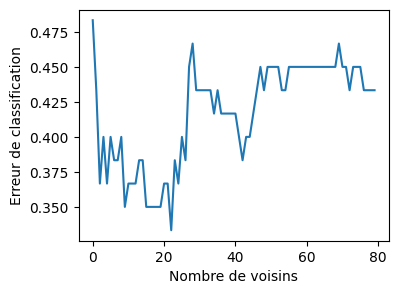

In [147]:
plt.figure(figsize=(4,3))
plt.plot(classification_error)
plt.xlabel('Nombre de voisins')
plt.ylabel('Erreur de classification')
print(min(classification_error))

## Question 3

In [148]:
'''
Fonctionnement de la commande GridSearchCV
1. Définir param_grid = {'hyperparamètre/nom_méthode': [...], 'pénalité':[...]}
2. Créer un objet du modèle qu'on cherche à optimiser : obj = Classifieur()
3. Créer un objet GridsearchCV et faire comme les autres modèles : grid = GridSearchCV(estimator=obj, param_grid=..., cv=..., scoring=..., grid)
4. faire fit, puis best_param = grid.best_params_['nom_méthode'], puis best_score = grid.best_score_, grid.cv_results_
'''

param_grid_ = {'n_neighbors': np.arange(1,81)}
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator = knn, param_grid=param_grid_)
grid.fit(X_train, y_train)
grid_result = grid.cv_results_

pd.DataFrame(grid_result).head(1)
#best_k = grid.best_params_['n_neighbors']
#best_score = grid.best_score_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001875,0.003156,0.003964,0.005238,1,{'n_neighbors': 1},0.645833,0.604167,0.595745,0.595745,0.574468,0.603191,0.023474,80


0.28661347517730495


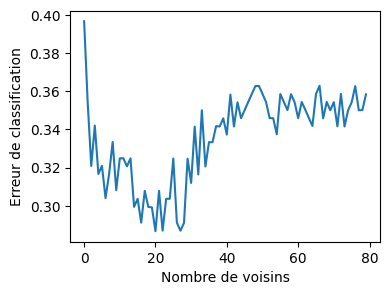

In [149]:
error_grid = 1 - grid_result['mean_test_score']
plt.figure(figsize=(4,3))
plt.plot(error_grid)
plt.xlabel('Nombre de voisins')
plt.ylabel('Erreur de classification')
print(min(error_grid))

## Question 4

0.25681818181818195


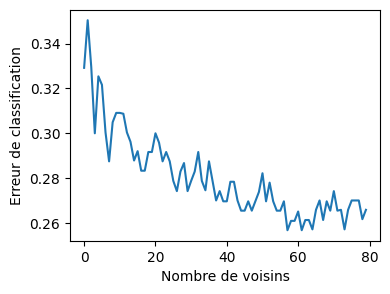

In [150]:
ssc = StandardScaler()
X_train_scaled = ssc.fit_transform(X_train)
X_test_scaled = ssc.transform(X_test)

param_grid_ssc = {'n_neighbors': np.arange(1,81)}
knn_ssc = KNeighborsClassifier()
grid_ssc = GridSearchCV(knn_ssc, param_grid_ssc, cv=20)
grid_ssc.fit(X_train_scaled, y_train)
grid_result_ssc = grid_ssc.cv_results_

error_grid_ssc = 1 - grid_result_ssc['mean_test_score']
plt.figure(figsize=(4,3))
plt.plot(error_grid_ssc)
plt.xlabel('Nombre de voisins')
plt.ylabel('Erreur de classification')

print(min(error_grid_ssc))

## Question 5
On utilise maintenant toutes la base de données, en gardant les variables quantitatives centrées et réduites.

In [165]:
stdc = StandardScaler()
X_stand = stdc.fit_transform(X)
X_total = pd.DataFrame(X_stand)

X_total = pd.concat([X_total, df[['cp', 'exang', 'slope','ca', 'thal']]], axis = 1)
X_total.columns = X_total.columns.astype(str)

0.1601950354609929


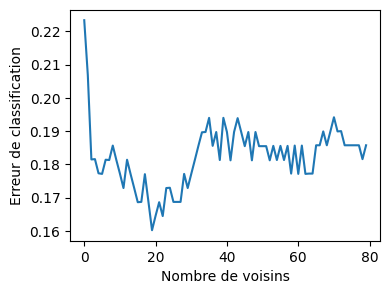

In [ ]:
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X_total, y, train_size=0.8)

knn_total = KNeighborsClassifier()
grid_total = GridSearchCV(knn_total, param_grid_)
grid_total.fit(X_train_total, y_train_total)
grid_result_total = grid_total.cv_results_

error_grid_total = 1 - grid_result_total['mean_test_score']
plt.figure(figsize=(4,3))
plt.plot(error_grid_total)
plt.xlabel('Nombre de voisins')
plt.ylabel('Erreur de classification')

print(min(error_grid_total))

En regardant le minimum des erreurs des différents modèles, on se rend compte que le meilleur correspond au dernier, c'est à dire à celui où nous considérons toutes les variables, dont les variables quantitatives sont centrées et réduites et en utilisant GridSearchCV avec le modèle des k-plus-proches-voisins.

## Question 6

In [153]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

print(accuracy_score(y_test, y_pred_LR))

0.7166666666666667


In [154]:
LR = LogisticRegression()
LR.fit(X_train_total, y_train_total)
y_pred_LR = LR.predict(X_test_total)

# Calcul des Odds Ratios
odds_ratios = pd.DataFrame({
    'Variable': df.columns[:-1],
    'Coefficient': LR.coef_[0],
    'Odds Ratio': np.exp(LR.coef_[0])
})
print(odds_ratios)

   Variable  Coefficient  Odds Ratio
0       age    -0.042030    0.958841
1  trestbps     0.324255    1.382999
2      chol     0.036590    1.037268
3   thalach    -0.288316    0.749525
4   oldpeak     0.365427    1.441130
5        cp     0.728675    2.072334
6     exang     0.595663    1.814234
7     slope     0.474220    1.606760
8        ca     1.190006    3.287100
9      thal     0.958697    2.608296


In [155]:
conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)
pd.DataFrame(conf_matrix_LR)

,0,1
0,14,16
1,16,14


In [156]:
accuracy = accuracy_score(y_test, y_pred_LR)
print("Exactitude :", accuracy)

Exactitude : 0.4666666666666667
